# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as c
import mesa_web

## a)

This problem involves creating an H-R diagram showcasing the main sequence (MS) post-main-sequence (PMS) evolution of a star. In this case, I analyze a 5 M$_{\odot}$ star with high metallicity. Let's start with the H-R diagram. In this analysis, I'll pick point 10 of the PMS evolution, which for a 5 M$_{\odot}$ star corresponds to the thermal-pulse aymptotic giant branch (TP-AGB) phase.

In [2]:
# define the path containing the MESA files
mesa_dir = 'high-metal-low-mass/MESA-Web_Job_09262318628/'

# append the history file name to the path
history_fname = mesa_dir + 'trimmed_history.data'

# read in the history files using mesa_web
data_dict = mesa_web.read_history(history_fname)

In [3]:
# extract the age (time coordinate), luminosity, temperature, and radius
age = np.log10(data_dict['star_age'])
L = data_dict['log_L']
T = data_dict['log_Teff']
R = data_dict['log_R']

# slice above arrays (except radius) during the main sequence phase
ms_start = 260
ms_end = 5500
age_ms = age[ms_start:ms_end]
T_ms = T[ms_start:ms_end]
L_ms = L[ms_start:ms_end]

# slice above arrays (except radius) during the post-main-sequence phase
pms_start = ms_end
pms_end = -1
age_pms = age[pms_start:pms_end]
T_pms = T[pms_start:pms_end]
L_pms = L[pms_start:pms_end]

# indices of the start and end of the TP-AGB phase
TP_start = 6330
TP_end = 8560
TP_mid = (TP_start+TP_end)//2 # index at which the TP-AGB phase is centered

# slice the above arrays during the TP-AGB phase
age_TP = age[TP_start:TP_end]
T_TP = T[TP_start:TP_end]
L_TP = L[TP_start:TP_end]
R_TP = R[TP_start:TP_end]

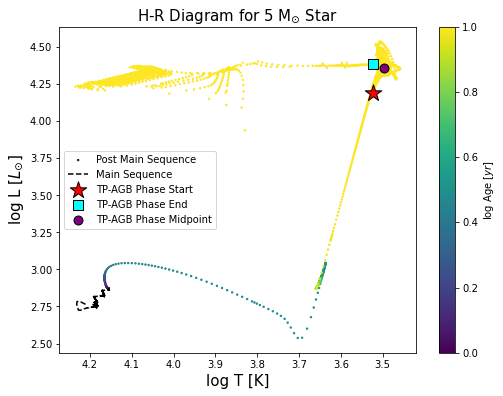

In [4]:
# H-R diagram for the 1 solar mass star during PMS and MS
plt.figure(figsize=(8, 6))
plt.scatter(T_pms, L_pms, s=2, c=age_pms, cmap='viridis', label='Post Main Sequence')
plt.plot(T_ms, L_ms, c='k', ls='--', label='Main Sequence')
plt.scatter(T_TP[0], L_TP[0], s=300, c='red', edgecolors='black', \
            marker='*', label='TP-AGB Phase Start')
plt.scatter(T_TP[-1], L_TP[-1], s=100, c='cyan', edgecolors='black', \
            marker='s', label='TP-AGB Phase End')
plt.scatter(T[TP_mid], L[TP_mid], s=320, c='purple', edgecolors='black', \
            marker='.', label='TP-AGB Phase Midpoint')

plt.title(r'H-R Diagram for 5 M$_{\odot}$ Star', fontsize=15)
plt.gca().invert_xaxis()
plt.xlabel(r'log T [K]', fontsize=15)
plt.ylabel(r'log L $[L_{\odot}]$', fontsize=15)
plt.colorbar(label=r'log Age $[yr]$')
plt.legend();

## b)

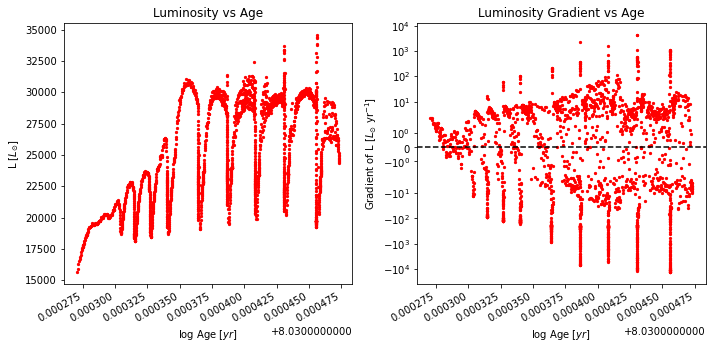

In [5]:
# make plots of the luminosity and luminosity gradient as a function of age
L_grad_TP = np.gradient(10**L_TP, 10**age_TP)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_yscale('symlog') 
ax[0].scatter(age_TP, 10**L_TP, c='r', s=5)
ax[1].scatter(age_TP, L_grad_TP, c='r', s=5)
ax[1].axhline(0, c='k', ls='--')

ax[0].set_title('Luminosity vs Age')
ax[1].set_title('Luminosity Gradient vs Age')
ax[0].set_xlabel(r'log Age $[yr]$')
ax[1].set_xlabel(r'log Age $[yr]$')
ax[0].set_ylabel(r'L $[L_{\odot}]$')
ax[1].set_ylabel(r'Gradient of L $[L_{\odot}$ yr$^{-1}]$')

plt.tight_layout()
fig.autofmt_xdate()

From the gradient plot, and the luminosity plot itself, we can clearly see the multiple helium flashes that occur as the thick hydrogen burning outer shell continually dumps helium ash on the inner helium burning shell. At these points, the luminosity suddenly plummets, somewhat counterintuitively. This is because the release of energy from the helium shell pushes out the dominant hydrogen burning shell, cooling it down substantially and causing the total luminosity to drop. Once the degeneracy of the helium shell goes down as the helium is used up and it absorbs energy, the hydrogen shell returns deeper in the star and heats back up, bringing the star back to the pre-flash luminosity. Generally, as stated in the textbook, the luminosity does trend upwards throughout this phase, regardless of the intermittent flashes.

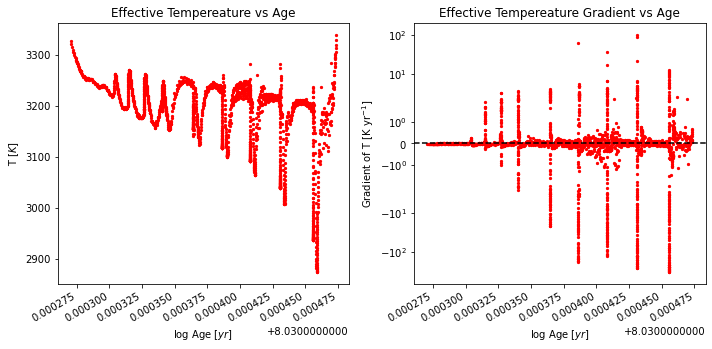

In [6]:
# make plots of the temperature and temperature gradient as a function of age
T_grad_TP = np.gradient(10**T_TP, 10**age_TP)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_yscale('symlog') 
ax[0].scatter(age_TP, 10**T_TP, c='r', s=5)
ax[1].scatter(age_TP, T_grad_TP, c='r', s=5)
ax[1].axhline(0, c='k', ls='--')

ax[0].set_title('Effective Tempereature vs Age')
ax[1].set_title('Effective Tempereature Gradient vs Age')
ax[0].set_xlabel(r'log Age $[yr]$')
ax[1].set_xlabel(r'log Age $[yr]$')
ax[0].set_ylabel(r'T $[K]$')
ax[1].set_ylabel(r'Gradient of T [K yr$^{-1}$]')
plt.tight_layout()
fig.autofmt_xdate()

From this plot, we see that the locations corresponding to the helium flashes in the luminosity plot, where the luminosity plummets, correspond to the points at which the effective temperature suddenly rises. This is causes by the hydrogen burning shell being pushed upwards. Once it sinks down again, the temperature returns to its original value (roughly). However, again, we see a nice confirmation of the theory in the textbook as the effective temperature is trending downwards throughout the phase.

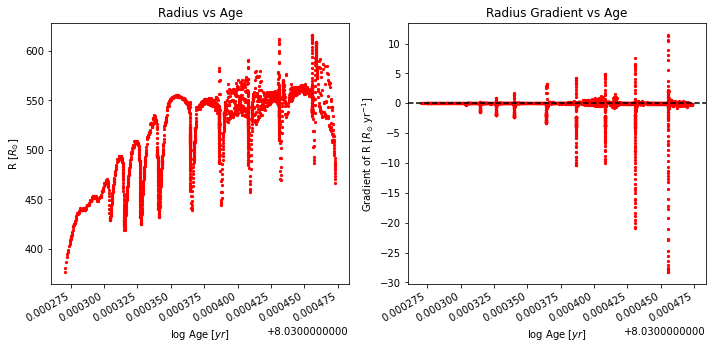

In [7]:
# make plots of the radius and radius gradient as a function of age
R_grad_TP = np.gradient(10**R_TP, 10**age_TP)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(age_TP, 10**R_TP, c='r', s=5)
ax[1].scatter(age_TP, R_grad_TP, c='r', s=5)
ax[1].axhline(0, c='k', ls='--')

ax[0].set_title('Radius vs Age')
ax[1].set_title('Radius Gradient vs Age')
ax[0].set_xlabel(r'log Age $[yr]$')
ax[1].set_xlabel(r'log Age $[yr]$')
ax[0].set_ylabel(r'R $[R_{\odot}]$')
ax[1].set_ylabel(r'Gradient of R $[R_{\odot}$ yr$^{-1}]$')
plt.tight_layout()
fig.autofmt_xdate()

When the helium flashes occur and the luminosity plummets, so does the radius. The book doesn't explicitly explain why, but it may be because of the drop in luminosity causing the star to contract as the radiative support dies down. The textbook also doesn't say how exactly the radius should evolve over the phase, but based on the diagrammatic TP-AGB track (roughly vertical, slightly to the right), we are crossing contours of constant radius from low to high. This means that we should indeed expect the star to increase in radius, and this is indeed reflected in the above plots.

## c)

In [8]:
# get the age of the star in the middle of the TP-AGB phase
print(f"Age of star at middle of TP-AGB phase: {10**age[TP_mid]/1e6:.4} My")

# determine the profile file index corresponding to this age by trial and error
profile_index = 130

# make filename of profile datafile
profile_fname = mesa_dir + f'profile{profile_index}.data'

# read in the profile file at this time step using mesa_web
profile_dict = mesa_web.read_profile(profile_fname)

# check the age of the star at this time step
profile_age = profile_dict['star_age']
print(f"Star age at snapshot {profile_index}: {profile_age/1e6:.4} My")

Age of star at middle of TP-AGB phase: 107.2 My
Star age at snapshot 130: 107.2 My


In [9]:
r = profile_dict['radius'] # radius coordinate
pp = profile_dict['pp'] # p-p chain energy generation rate
cno = profile_dict['cno'] # cno cycle energy generation rate
tri_alpha = profile_dict['tri_alfa'] # triple alpha process ``

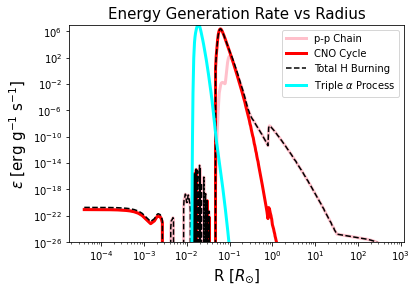

In [10]:
# plot of luminosities (total H burning and by source) vs age
plt.loglog(r, pp, c='pink', lw=3, label='p-p Chain')
plt.loglog(r, cno, c='red', lw=3, label='CNO Cycle')
plt.loglog(r, pp+cno, c='black', ls='--', label='Total H Burning')
plt.loglog(r, tri_alpha, c='cyan', lw=3, label=r'Triple $\alpha$ Process')

plt.title('Energy Generation Rate vs Radius', fontsize=15)
plt.xlabel(r'R $[R_{\odot}]$', fontsize=15)
plt.ylabel(r'$\epsilon$ [erg g$^{-1}$ s$^{-1}$]', fontsize=15)
plt.ylim(1e-26, 1e7)
plt.legend();

The plot above really nicely shows the inner helium burning shell and the outer hydrogen burning shell. As we can see, the inner core is relatively dormant as expected, as it has been filled with heavy ash which can't yet fuse. The outer layers are also too cool or not dense enough for fusion to occur.

## d)
I'll make a figure looking at the outermost region where the helium mass fraction is greater than 0.01. Theoretically, when the hydrogen burning shell stars dumping significant amount of helium ash on the helium shell, it should start burning and cause a helium flash. So we expect this radius (which I call the "helium radius" from here on out) to spike up just as a helium flash occurs.

In [11]:
# get the helium radius and slice it during TP phase
R_he_core = data_dict['he_core_radius']
R_he_core_TP = R_he_core[TP_start:TP_end]

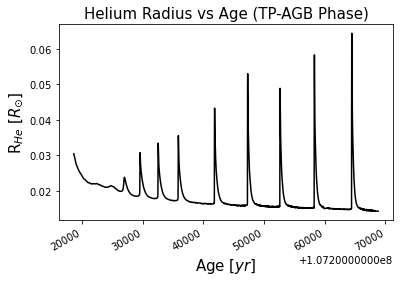

In [16]:
# plot the helium radius vs age
plt.plot(10**age_TP, R_he_core_TP, c='k')
plt.title('Helium Radius vs Age (TP-AGB Phase)', fontsize=15)
plt.xlabel(r'Age $[yr]$', fontsize=15)
plt.ylabel(r'R$_{He}$ $[R_{\odot}]$', fontsize=15)
plt.gcf().autofmt_xdate()
plt.savefig('ansh-discussion-figure.png', dpi=300)

Nice! We see the same 9 spikes that correspond to the 9 major helium flashes we saw in part b). So this is a good way to directly show that those spikes in energy are coming from helium burning kicking on in a shell outside the core.